# Exploring OMV

In [1]:
import sys
import os
os.chdir('C:/Users/lmillischer/PycharmProjects/eutl_orm')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import networkx as nx

from eutl_orm import DataAccessLayer
from eutl_orm import Installation, Account    
from attic import paths
from attic.connection_settings import connectionSettings

%matplotlib inline
plt.rc('xtick', labelsize=14)  #fontsize of the x tick labels
plt.rc('ytick', labelsize=14)  #fontsize of the y tick labels
plt.rc('axes', titlesize=18)  #fontsize of the title
plt.rc('figure', titlesize=20)  #fontsize of the title
plt.rc('axes', labelsize=15)  #fontsize of the axes labels
plt.rc('legend', fontsize=15)  #fontsize of the axes labels

dal = DataAccessLayer(**connectionSettings)
session = dal.session

In [2]:
# "AT_26": Raffinerie Schwechat

installation_id = "AT_26"

In [3]:
installation = session.query(Installation).get(installation_id)
print(installation.id + ": " + installation.name)
print(installation.address)

AT_26: Raffinerie Schwechat
Mannswörther Straße 28
2320 Schwechat
Austria


In [4]:
surrendering = installation.get_surrendering()
compliance = installation.get_compliance()
# fig, ax = plt.subplots(figsize=(10,5))
# #ax.bar(surrendering.year, surrendering.amount / 1e3)
# #ax.bar(compliance.year, compliance.amount / 1e3, alpha=0.5, label="compliance")

# fig.autofmt_xdate()
# ax.grid()
# ax.set_ylabel("surrendered amount [kt]")
# ax.set_title(installation.name)

## Retrieve all transactions in which Schwechat was involved

In [5]:
operator_holding_accounts = installation.accounts
operator_holding_account = operator_holding_accounts[0]  # retain only current account
transactions = operator_holding_account.get_transactions()
display(transactions)

,transactionTypeSupplementary_id,acquiringAccount_id,project_id,id,transactionID,transactionTypeMain_id,transferringAccount_id,unitType_id,amount,unitType,transactionTypeMain,transactionTypeSupplementary,acquiringAccountName,acquiringAccountType,transferringAccountName,transferringAccountType,direction,amount_directed
date,,,,,,,,,,,,,,,,,,
2012-07-09 12:00:12.907,0,494,1744.0,2216514,EU31002,10,698,CER,1842,CER - Certified Emission Reduction Unit,Internal - Internal transfer of unit/supplemen...,NaN,AT Raffinerie Schwechat,Operator Holding Account,AT OMVTRADING,Trading Account,1,1842
2012-07-09 12:00:12.907,0,494,1744.0,2216515,EU31002,10,698,CER,152,CER - Certified Emission Reduction Unit,Internal - Internal transfer of unit/supplemen...,NaN,AT Raffinerie Schwechat,Operator Holding Account,AT OMVTRADING,Trading Account,1,152
2012-07-09 12:00:12.907,0,494,447.0,2216516,EU31002,10,698,CER,57,CER - Certified Emission Reduction Unit,Internal - Internal transfer of unit/supplemen...,NaN,AT Raffinerie Schwechat,Operator Holding Account,AT OMVTRADING,Trading Account,1,57
2012-07-09 12:00:19.058,0,494,838.0,28044,AT22137,3,223,CER,8183,CER - Certified Emission Reduction Unit,External - External transfer of unit between r...,NaN,AT Raffinerie Schwechat,Operator Holding Account,AT Raffinerie Schwechat,Former Operator Holding Account,1,8183
2012-07-09 12:00:19.058,0,494,838.0,28043,AT22137,3,223,CER,10000,CER - Certified Emission Reduction Unit,External - External transfer of unit between r...,NaN,AT Raffinerie Schwechat,Operator Holding Account,AT Raffinerie Schwechat,Former Operator Holding Account,1,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-17 14:15:10.237,2,15478,NaN,2660340,EU450764,10,494,EUA_2013,413731,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-413731
2018-04-17 14:15:10.237,2,15478,NaN,2660341,EU450764,10,494,EUA_2013,324600,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-324600
2018-04-17 14:15:10.237,2,15478,NaN,2660342,EU450764,10,494,EUA_2013,1595273,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-1595273


In [6]:
selected_transactions = transactions[transactions.index.year == 2016][['acquiringAccount_id', 'transferringAccount_id', 'amount']]
selected_transactions

,acquiringAccount_id,transferringAccount_id,amount
date,,,
2016-02-19 01:12:12.861,494,15486,1675141
2016-04-12 12:35:19.192,15478,494,240000
2016-04-12 12:35:19.192,15478,494,16493
2016-04-12 12:35:19.192,15478,494,13507
2016-04-12 12:35:19.192,15478,494,130000
2016-04-12 12:35:19.192,15478,494,45659
2016-04-12 12:35:19.192,15478,494,368350
2016-04-12 12:35:19.192,15478,494,314900
2016-04-12 12:35:19.192,15478,494,1675141


In [7]:
collapsed_transactions = transactions.groupby(['acquiringAccount_id', 'transferringAccount_id'], as_index=False)['amount'].sum()
collapsed_transactions
collapsed_transactions.to_csv('data/transactions_for_arrowgraph.csv')

We build a transfer matrix T[i,j] (i: row index, j: column index) where T[i,j] is the amount transferred from i to j.

In [8]:
unique_account_ids_1 = collapsed_transactions['acquiringAccount_id'].unique()
unique_account_ids_2 = collapsed_transactions['transferringAccount_id'].unique()

unique_account_ids = np.unique(np.append(unique_account_ids_1, unique_account_ids_2))

transfer_matrix = pd.DataFrame(0.0, index=unique_account_ids, columns=unique_account_ids)
for _, row in collapsed_transactions.iterrows():
    transfer_matrix.loc[row['acquiringAccount_id'], row['transferringAccount_id']] = row["amount"]
transfer_matrix

,11,178,223,494,671,672,673,698,5025,15478,15486,41288,41289
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178,0.0,0.0,0.0,399180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
494,3880455.0,0.0,235000.0,0.0,0.0,0.0,40000.0,1356582.0,230000.0,0.0,10183831.0,140902.0,0.0
671,0.0,0.0,0.0,716.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
672,0.0,0.0,0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
673,0.0,0.0,0.0,52102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
698,0.0,0.0,0.0,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15478,0.0,0.0,0.0,16113833.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
transfer_matrix

,11,178,223,494,671,672,673,698,5025,15478,15486,41288,41289
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178,0.0,0.0,0.0,399180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
494,3880455.0,0.0,235000.0,0.0,0.0,0.0,40000.0,1356582.0,230000.0,0.0,10183831.0,140902.0,0.0
671,0.0,0.0,0.0,716.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
672,0.0,0.0,0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
673,0.0,0.0,0.0,52102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
698,0.0,0.0,0.0,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15478,0.0,0.0,0.0,16113833.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


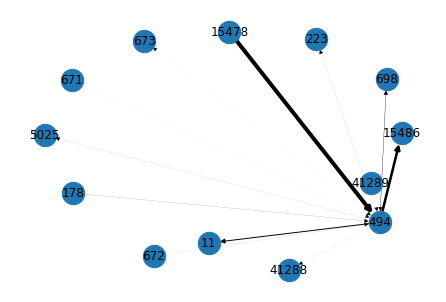

In [10]:
rows, cols = np.where(transfer_matrix > 0)
edges = zip(rows.tolist(), cols.tolist())

gr = nx.DiGraph()

weights=[]
for x,y in edges:
    gr.add_edge(x,y, weight=1/transfer_matrix.iloc[x,y])
    weights.append(transfer_matrix.iloc[x,y])

weights = np.array(weights)
weights = weights / weights.max() * 4
    
node_labels = {k:str(account_id) for k, account_id in enumerate(transfer_matrix.columns)}

nx.draw(gr, node_size=500, labels=node_labels, with_labels=True, 
        width=weights)
plt.show()

<BarContainer object of 14 artists>

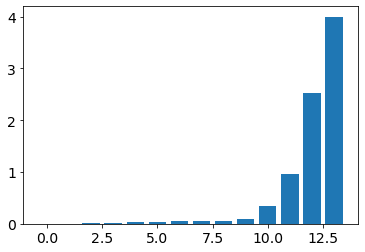

In [11]:
fig, ax = plt.subplots()
ax.bar(range(len(weights)), sorted(weights))

In [12]:
operator_holding_account = installation.accounts[0]
account_holder = operator_holding_account.accountHolder
account_holder_id = operator_holding_account.accountHolder.id
print(f"Account Holder: {account_holder.name}")

Account Holder: OMV Downstream GmbH


Retrieve all accounts associated to the Account Holder "OMV Downstream"

In [13]:
accounts = session.query(Account).filter(Account.accountHolder_id == account_holder_id) \
.filter(Account.accountType_id == "100-7").all()